In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# ▶ Toy data 생성
df_train = pd.DataFrame([
        [2, 1, 3],
        [3, 2, 5],
        [3, 4, 7],
        [5, 5, 10],
        [7, 5, 12],
        [2, 5, 7],
        [8, 9, 13],
        [9, 10, 13],
        [10, 50, 12], # ▶ 이상값 추가
        [11, 45, 13], # ▶ 이상값 추가
        [6, 12, 12]
    ], columns=['hour', 'attendance', 'score'])

df_test = pd.DataFrame([
        [9, 2, 13],
        [6, 10, 12],
        [2, 4, 6]
    ], columns=['hour', 'attendance', 'score'])

In [2]:
# ▶ 데이터 확인
df_test

,hour,attendance,score
0,9,2,13
1,6,10,12
2,2,4,6


In [3]:
# ▶ 모델 생성 및 예측
outlier = LocalOutlierFactor(n_neighbors=5, contamination=0.2)
y_predict = outlier.fit_predict(df_train)
df_train['outlier'] = y_predict
df_train

,hour,attendance,score,outlier
0,2,1,3,1
1,3,2,5,1
2,3,4,7,1
3,5,5,10,1
4,7,5,12,1
5,2,5,7,1
6,8,9,13,1
7,9,10,13,1
8,10,50,12,-1
9,11,45,13,-1


In [4]:
# ▶ LOF 값 확인
# ▶ negative_outlier_factor_ : The opposite LOF of the training samples.
outlier.negative_outlier_factor_

array([-1.06346871, -0.98978233, -1.00762509, -0.96108658, -0.9695593 ,
       -0.98978233, -1.03803244, -1.06451306, -4.10433958, -3.79462448,
       -1.07588605])

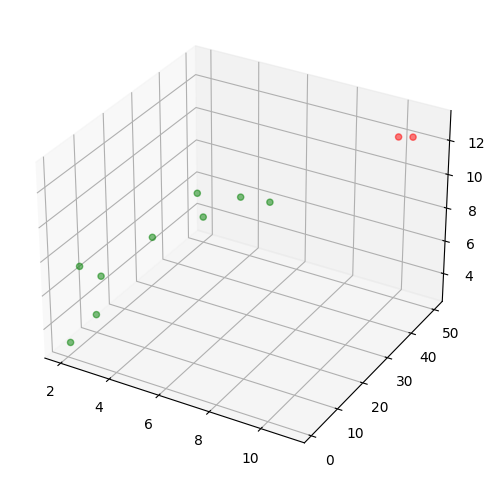

In [5]:
# ▶ 3D plot 및 확인
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

df_red = df_train[df_train['outlier']==-1]
df_green = df_train[df_train['outlier']==1]

ax.scatter(df_red['hour'], df_red['attendance'],df_red['score'], color = 'r', alpha = 0.5);
ax.scatter(df_green['hour'], df_green['attendance'],df_green['score'], color = 'g', alpha = 0.5);